
# Previous Instructions

For this activity, you will need to install to libraries: Keras and TensorFlow (CPU-only). 
More instructions are available at: https://keras.io/#installation and https://www.tensorflow.org/install/.

# Sentiment Analysis of Movie Reviews:  a binary classification example

Example obtained from the book "Deep Learning with Python; CHOLLET, François"

Two-class classification, or binary classification, may be the most widely applied kind
of machine-learning problem. In this example, you will learn to classify movie reviews as
positive or negative, based on the text content of the reviews using Recurrent Neural Networks.

### The IMDB Dataset

You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

#### Loading dataset

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
# The argument num_words=10000 means you’ll only keep the top 10,000 most frequently 
# occurring words in the training data. Rare words will be discarded. The variable maxlen 
# defines the maximum number of words analysed in each review (reviews with more than maxlen 
# words will be truncated). The variable batch_size defines the number of inputs given in 
# batch to the model for training.
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
# The function pad_sequences receives a list of sequences normalize each one to have
# maxlen elmements
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Define the model

We will define the RNN with three layers. 

* Embedding layer applies a linear transformation  on the entry in order to reduce the size of vectors. 
* SimpleRNN is the basic Recurrent Neural Network Model
* Dense implements an activation operation


In [15]:
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras import models
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### Validating your approach

In order to monitor during training the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting 20\% of samples from the
original training data.

In [17]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.6401 - acc: 0.6177 - val_loss: 0.5082 - val_acc: 0.7676

## Plot results

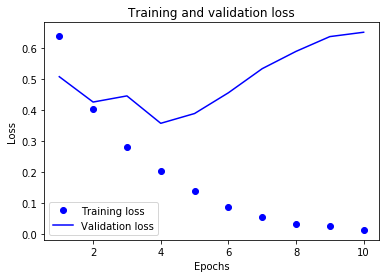

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(val_loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

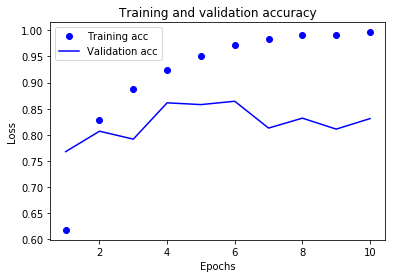

In [19]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Retraining a model from scratch and evaluate it

In [20]:
model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128)

Epoch 1/10
25000/25000 [==============================] - 82s 3ms/step - loss: 0.4977 - acc: 0.7654

In [21]:
results = model.evaluate(input_test, y_test)

25000/25000 [==============================] - 39s 2ms/step

In [22]:
print(model.metrics_names)
print(results)

['loss', 'acc']
[0.3987516041779518, 0.85407999999999995]


### Using a trained network to generate predictions on new data

In [ ]:
## #After having trained a network, you’ll want to use it in a practical setting. You can gen-
# gerate the likelihood of reviews being positive by using the predict method
model.predict(x_test[:1])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[0]])
decoded_review